In [1]:
import os, time, random
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Dense, Input, GlobalMaxPooling1D, Flatten, TimeDistributed, Bidirectional
from keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM, Dropout, Activation, Permute
from keras import regularizers
from keras.models import Model, Sequential
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import TensorBoard
from keras import backend as K
#from keras.backend import permute_dimensions
from sklearn.model_selection import train_test_split
print(tf.__version__)
print(keras.__version__)

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")
    
with tf.device('/cpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)

with tf.Session() as sess:
    print(sess.run(c))

1.13.1
2.2.4
No GPU found
[[22. 28.]
 [49. 64.]]


Using TensorFlow backend.


In [2]:
# from keras_handler.SequenceGenerator import SequenceGenerator
# sg = SequenceGenerator(PredictIntent.data_path, PredictIntent.intent_index, PredictIntent.max_sequence_length, 0.2)
# generator = sg.generate_batch(5, subset='training')
# tuple1 = next(generator)
# print(tuple1[0].shape)
# print(tuple1[1].shape)

In [3]:
from keras_handler.predict_intent import PredictIntent

In [4]:
pi = PredictIntent(is_general = False)
pi.batch_size = 13
pi.max_sequence_length = 5
pi.intent_embedding_dim = 10
pi.num_units = 30
pi.validation_split = 0.2
pi.random_state = 42
pi.data_path = "../../sandbox/feature_and_vector_seq"

num_intents 26


In [ ]:
pi.build_BiRNN_model()
history_BiRNN = pi.fit_generator(epochs = 100)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
471/809 [================>.............] - ETA: 8s - loss: 2.6378 - acc: 0.2141

In [51]:
pi.build_RNN_model()
history_RNN = pi.fit_generator(epochs = 100)

preds.shape (?, 4, 26)
Epoch 1/100
809/809 [==============================] - 23s 29ms/step - loss: 2.8342 - acc: 0.1876 - val_loss: 2.7032 - val_acc: 0.20990s - loss: 2.8352 - acc: 0.187
Epoch 2/100
809/809 [==============================] - 23s 28ms/step - loss: 2.6631 - acc: 0.2238 - val_loss: 2.6923 - val_acc: 0.2089
Epoch 3/100
809/809 [==============================] - 22s 28ms/step - loss: 2.6324 - acc: 0.2373 - val_loss: 2.6855 - val_acc: 0.2079
Epoch 4/100
809/809 [==============================] - 22s 27ms/step - loss: 2.6363 - acc: 0.2350 - val_loss: 2.6504 - val_acc: 0.2247
Epoch 5/100
809/809 [==============================] - 23s 28ms/step - loss: 2.6166 - acc: 0.2440 - val_loss: 2.6300 - val_acc: 0.2355
Epoch 6/100
809/809 [==============================] - 22s 27ms/step - loss: 2.6100 - acc: 0.2480 - val_loss: 2.6212 - val_acc: 0.2386
Epoch 7/100
809/809 [==============================] - 23s 28ms/step - loss: 2.5750 - acc: 0.2566 - val_loss: 2.6453 - val_acc: 0.2259
Ep

In [56]:
pi.build_CNN_model()
history_CNN = pi.fit_generator(epochs = 100)

Epoch 1/100
809/809 [==============================] - 22s 27ms/step - loss: 2.9454 - acc: 0.1158 - val_loss: 2.8787 - val_acc: 0.1494
Epoch 2/100
809/809 [==============================] - 21s 26ms/step - loss: 2.8221 - acc: 0.1641 - val_loss: 2.7482 - val_acc: 0.1898
Epoch 3/100
809/809 [==============================] - 21s 26ms/step - loss: 2.7107 - acc: 0.2095 - val_loss: 2.6090 - val_acc: 0.2607
Epoch 4/100
809/809 [==============================] - 21s 26ms/step - loss: 2.5529 - acc: 0.2793 - val_loss: 2.4454 - val_acc: 0.3057- loss
Epoch 5/100
809/809 [==============================] - 21s 27ms/step - loss: 2.3838 - acc: 0.3261 - val_loss: 2.3137 - val_acc: 0.3464
Epoch 6/100
809/809 [==============================] - 21s 26ms/step - loss: 2.2829 - acc: 0.3662 - val_loss: 2.1802 - val_acc: 0.4049
Epoch 7/100
809/809 [==============================] - 21s 26ms/step - loss: 2.1948 - acc: 0.4035 - val_loss: 2.1948 - val_acc: 0.4103
Epoch 8/100
809/809 [============================

In [5]:
pi.build_MLP_model()
history_MLP = pi.fit_generator(epochs = 100)

Epoch 1/100
809/809 [==============================] - 22s 27ms/step - loss: 2.9887 - acc: 0.1136 - val_loss: 2.8725 - val_acc: 0.1462
Epoch 2/100
809/809 [==============================] - 21s 27ms/step - loss: 2.8533 - acc: 0.1610 - val_loss: 2.8205 - val_acc: 0.1790
Epoch 3/100
809/809 [==============================] - 22s 27ms/step - loss: 2.8038 - acc: 0.1863 - val_loss: 2.7608 - val_acc: 0.1927
Epoch 4/100
809/809 [==============================] - 21s 26ms/step - loss: 2.7642 - acc: 0.2083 - val_loss: 2.7465 - val_acc: 0.2206
Epoch 5/100
809/809 [==============================] - 21s 26ms/step - loss: 2.7098 - acc: 0.2398 - val_loss: 2.6791 - val_acc: 0.2492
Epoch 6/100
809/809 [==============================] - 22s 27ms/step - loss: 2.6769 - acc: 0.2640 - val_loss: 2.6609 - val_acc: 0.2806
Epoch 7/100
809/809 [==============================] - 21s 26ms/step - loss: 2.6231 - acc: 0.2924 - val_loss: 2.5886 - val_acc: 0.3142
Epoch 8/100
809/809 [==============================] - 

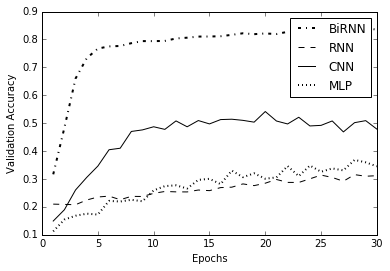

In [88]:
len_y = 30
x = range(1,len_y+1)
y1 = history_BiRNN.history['val_acc'][:len_y]
y2 = history_RNN.history['val_acc'][:len_y]
y3 = history_CNN.history['val_acc'][:len_y]
y4 = history_MLP.history['val_acc'][:len_y]

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")

plt.plot(x,y1, 'k-.', label='BiRNN', linewidth=2)
plt.plot(x,y2, 'k--', label='RNN', linewidth=1)
plt.plot(x,y3, 'k-', label='CNN', linewidth=1)
plt.plot(x,y4, 'k:', label='MLP', linewidth=2)
plt.legend(loc='upper right')

In [ ]:
# 25 int

# RNN, 100 ep return_sequences=True 
# 13100 30 - loss: 2.9677 - acc: 0.1152
# 1310  30 - loss: 2.6313 - acc: 0.2464
# 131   30 - loss: 1.8456 - acc: 0.4678
# 13    30 - loss: 2.1301 - acc: 0.4263
# 1     30 - loss: 2.5108 - acc: 0.2834

# BiRNN, 100 ep return_sequences=True
# 1310    2s/step - loss: 2.1712 - acc: 0.3397 - val_loss: 2.0868 - val_acc: 0.3754 
# 131  199ms/step - loss: 0.7650 - acc: 0.7808 - val_loss: 0.6818 - val_acc: 0.8034
# 13    27ms/step - loss: 0.6413 - acc: 0.8194 - val_loss: 0.5457 - val_acc: 0.8517 1-LSTM
# 13    30ms/step - loss: 0.6472 - acc: 0.8171 - val_loss: 0.5493 - val_acc: 0.8717 2-LSTM 
# 13    36ms/step - loss: 0.5443 - acc: 0.8493 - val_loss: 0.4665 - val_acc: 0.8766 3-LSTM 
# 1     20ms/step - loss: 0.7527 - acc: 0.7846 - val_loss: 0.6238 - val_acc: 0.8288

# MLP
# 131  199ms/step - loss: 4.6698 - acc: 0.3628 - val_loss: 2.0174 - val_acc: 0.4895
# 13  

# CNN
# 13  27ms/step - loss: 1.9294 - acc: 0.4842 - val_loss: 1.9757 - val_acc: 0.5213

In [206]:
pgi = PredictIntent(is_general = True)
pgi.batch_size = 13
pgi.max_sequence_length = 5
pgi.intent_embedding_dim = 10
pgi.num_units = 30
pgi.validation_split = 0.2
pgi.random_state = 42
pgi.data_path = "../feature_and_vector

num_intents 6


In [207]:
pgi.build_MLP_model()
pgi_MLP = pgi.fit_generator(epochs = 100)

6
Epoch 1/100
809/809 [==============================] - 23s 29ms/step - loss: 1.6340 - acc: 0.2727 - val_loss: 1.6095 - val_acc: 0.2967
Epoch 2/100
809/809 [==============================] - 22s 27ms/step - loss: 1.6057 - acc: 0.2865 - val_loss: 1.6016 - val_acc: 0.2893
Epoch 3/100
809/809 [==============================] - 22s 27ms/step - loss: 1.5914 - acc: 0.3022 - val_loss: 1.5844 - val_acc: 0.3205
Epoch 4/100
809/809 [==============================] - 22s 27ms/step - loss: 1.5776 - acc: 0.3217 - val_loss: 1.5822 - val_acc: 0.3019
Epoch 5/100
809/809 [==============================] - 22s 27ms/step - loss: 1.5602 - acc: 0.3423 - val_loss: 1.5781 - val_acc: 0.3466
Epoch 6/100
809/809 [==============================] - 22s 27ms/step - loss: 1.5521 - acc: 0.3547 - val_loss: 1.5300 - val_acc: 0.3709
Epoch 7/100
809/809 [==============================] - 22s 27ms/step - loss: 1.5255 - acc: 0.3709 - val_loss: 1.5164 - val_acc: 0.3779
Epoch 8/100
809/809 [==============================] 

In [196]:
pgi.build_CNN_model()
pgi_CNN = pgi.fit_generator(epochs = 100)

Epoch 1/100
809/809 [==============================] - 24s 29ms/step - loss: 1.6366 - acc: 0.2521 - val_loss: 1.6416 - val_acc: 0.2652
Epoch 2/100
809/809 [==============================] - 22s 27ms/step - loss: 1.6110 - acc: 0.2838 - val_loss: 1.6007 - val_acc: 0.2952
Epoch 3/100
809/809 [==============================] - 22s 27ms/step - loss: 1.5978 - acc: 0.3036 - val_loss: 1.5879 - val_acc: 0.2919: 1s - l
Epoch 4/100
809/809 [==============================] - 22s 27ms/step - loss: 1.5834 - acc: 0.3163 - val_loss: 1.5863 - val_acc: 0.3304
Epoch 5/100
809/809 [==============================] - 22s 27ms/step - loss: 1.5722 - acc: 0.3272 - val_loss: 1.5415 - val_acc: 0.3446
Epoch 6/100
809/809 [==============================] - 22s 27ms/step - loss: 1.5645 - acc: 0.3385 - val_loss: 1.5298 - val_acc: 0.3757
Epoch 7/100
809/809 [==============================] - 22s 27ms/step - loss: 1.5627 - acc: 0.3438 - val_loss: 1.5384 - val_acc: 0.3910
Epoch 8/100
809/809 [==========================

In [198]:
pgi.build_RNN_model()
pgi_RNN = pgi.fit_generator(epochs = 100)

Epoch 1/100
809/809 [==============================] - 26s 33ms/step - loss: 1.5746 - acc: 0.3089 - val_loss: 1.5121 - val_acc: 0.3245
Epoch 2/100
809/809 [==============================] - 23s 28ms/step - loss: 1.5101 - acc: 0.3301 - val_loss: 1.5092 - val_acc: 0.3213
Epoch 3/100
809/809 [==============================] - 23s 28ms/step - loss: 1.4966 - acc: 0.3401 - val_loss: 1.4996 - val_acc: 0.3363
Epoch 4/100
809/809 [==============================] - 23s 29ms/step - loss: 1.4923 - acc: 0.3459 - val_loss: 1.4940 - val_acc: 0.3369
Epoch 5/100
809/809 [==============================] - 23s 28ms/step - loss: 1.4888 - acc: 0.3478 - val_loss: 1.4929 - val_acc: 0.3405
Epoch 6/100
809/809 [==============================] - 23s 28ms/step - loss: 1.4822 - acc: 0.3552 - val_loss: 1.4849 - val_acc: 0.3576
Epoch 7/100
809/809 [==============================] - 23s 28ms/step - loss: 1.4867 - acc: 0.3532 - val_loss: 1.4789 - val_acc: 0.3599
Epoch 8/100
809/809 [==============================] - 

809/809 [==============================] - 23s 28ms/step - loss: 1.4234 - acc: 0.4094 - val_loss: 1.4187 - val_acc: 0.4146
Epoch 61/100
809/809 [==============================] - 23s 28ms/step - loss: 1.4205 - acc: 0.4116 - val_loss: 1.4015 - val_acc: 0.4276: 0s - loss: 1.4191 - acc: 0
Epoch 62/100
809/809 [==============================] - 23s 28ms/step - loss: 1.4221 - acc: 0.4101 - val_loss: 1.4162 - val_acc: 0.4126
Epoch 63/100
809/809 [==============================] - 23s 28ms/step - loss: 1.4183 - acc: 0.4130 - val_loss: 1.4014 - val_acc: 0.4264
Epoch 64/100
809/809 [==============================] - 23s 28ms/step - loss: 1.4209 - acc: 0.4109 - val_loss: 1.4098 - val_acc: 0.4209
Epoch 65/100
809/809 [==============================] - 23s 28ms/step - loss: 1.4218 - acc: 0.4107 - val_loss: 1.3995 - val_acc: 0.4265
Epoch 66/100
809/809 [==============================] - 23s 29ms/step - loss: 1.4170 - acc: 0.4131 - val_loss: 1.4002 - val_acc: 0.4263
Epoch 67/100
809/809 [===========

In [199]:
pgi.build_BiRNN_model()
pgi_BiRNN = pgi.fit_generator(epochs = 100)

Epoch 1/100
809/809 [==============================] - 29s 36ms/step - loss: 1.2450 - acc: 0.4709 - val_loss: 0.8934 - val_acc: 0.6451
Epoch 2/100
809/809 [==============================] - 25s 31ms/step - loss: 0.6425 - acc: 0.7434 - val_loss: 0.4245 - val_acc: 0.8201
Epoch 3/100
809/809 [==============================] - 25s 31ms/step - loss: 0.4368 - acc: 0.8130 - val_loss: 0.4122 - val_acc: 0.8154
Epoch 4/100
809/809 [==============================] - 25s 31ms/step - loss: 0.4157 - acc: 0.8157 - val_loss: 0.4021 - val_acc: 0.8203
Epoch 5/100
809/809 [==============================] - 25s 31ms/step - loss: 0.4118 - acc: 0.8166 - val_loss: 0.4019 - val_acc: 0.8244
Epoch 6/100
809/809 [==============================] - 25s 31ms/step - loss: 0.4061 - acc: 0.8200 - val_loss: 0.3960 - val_acc: 0.8298 1s - los
Epoch 7/100
809/809 [==============================] - 25s 31ms/step - loss: 0.4023 - acc: 0.8236 - val_loss: 0.3934 - val_acc: 0.8313
Epoch 8/100
809/809 [=========================

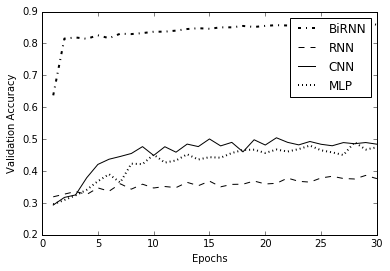

In [180]:
len_y = 30
x = range(1,len_y+1)
y1 = pgi_BiRNN.history['val_acc'][:len_y]
y2 = pgi_RNN.history['val_acc'][:len_y]
y3 = pgi_CNN.history['val_acc'][:len_y]
y4 = pgi_MLP.history['val_acc'][:len_y]

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.plot(x,y1, 'k-.', label='BiRNN', linewidth=2)
plt.plot(x,y2, 'k--', label='RNN', linewidth=1)
plt.plot(x,y3, 'k-', label='CNN', linewidth=1)
plt.plot(x,y4, 'k:', label='MLP', linewidth=2)
plt.legend(loc='upper right')

In [ ]:
# 5 int

# BiRNN, 100 ep return_sequences=True
# 1310    2s/step - loss: 0.4004 - acc: 0.8233 - val_loss: 0.3927 - val_acc: 0.8307
# 131  202ms/step - loss: 0.3991 - acc: 0.8246 - val_loss: 0.3849 - val_acc: 0.8351
# 13    30ms/step - loss: 0.3388 - acc: 0.8653 - val_loss: 0.3095 - val_acc: 0.8784
# 1     20ms/step - loss: 0.4259 - acc: 0.8244 - val_loss: 0.3680 - val_acc: 0.8561

# RNN
# 131 206ms/step - loss: 1.4664 - acc: 0.3696 - val_loss: 1.4653 - val_acc: 0.3773
# 13   28ms/step - loss: 1.4245 - acc: 0.4066 - val_loss: 1.3987 - val_acc: 0.4333

# MLP
# 131 200ms/step - loss: 6.7115 - acc: 0.2221 - val_loss: 4.0133 - val_acc: 0.2400

In [125]:
pd.read_hdf(r'C:\\Users\\Nikolay\\Desktop\\coll\\8-Nabokova-comm_rosbalt_39_79701_output_10.h5')

,ID of comment,ID of post,Likes,Intent analysis,Content analysis,Distance to parent,Distance to post,Doc2Vec value
0,79701,79701,0,,,0,1.1102230246251565e-16,[-0.033691 -0.037016 0.029007 0.008522 -0.0166...
1,79702,79701,2,м,20,1.017779691860642,1.017779691860642,[-0.020174 0.017773 0.023126 0.017003 0.041832...
2,79710,79701,0,у,30,1.0368699725836679,1.0201519054057373,[0.024097 0.024659 -0.037547 0.032659 0.078938...
3,79711,79701,0,и,40,0.8629165321940944,0.9791444162880745,[0.027835 -0.014688 -0.047072 0.005525 0.02313...


In [127]:
pd.read_hdf(r'C:\\Users\\Nikolay\\Desktop\\coll\\8-comm_rosbalt_39_79701_output_10.h5')

,ID of comment,ID of post,Likes,Intent analysis,Content analysis,Distance to parent,Distance to post,Doc2Vec value
0,79701,79701,0,,,0,1.1102230246251565e-16,[-0.033691 -0.037016 0.029007 0.008522 -0.0166...
1,79744,79701,0,и,4,0.7546659771982847,0.7546659771982847,[-0.028849 -0.061239 -0.010560 0.016685 0.0027...
2,79751,79701,1,ш,4,0.03985187965879533,0.7871806515179766,[-0.030819 -0.058584 -0.000901 -0.006251 -0.00...
3,79752,79701,1,ж,4,0.0747844151326491,0.7804029784202833,[-0.026400 -0.050600 -0.030745 0.025348 0.0184...
4,79753,79701,1,ш,4,0.02709519911693259,0.7546659771982847,[-0.028849 -0.061239 -0.010560 0.016685 0.0027...
5,79776,79701,3,ч,4,0.8295794789631287,0.25084034344965744,[-0.031889 -0.025769 0.032461 -0.006925 0.0022...
6,79778,79701,0,п,4,0.29660776038825853,0.31471159422776296,[-0.018071 -0.009378 0.044637 0.006586 -0.0093...
7,79783,79701,0,и,4,0.47136354315643714,0.4983164208788222,[-0.022603 0.006730 0.019023 -0.011535 -0.0062...
8,79784,79701,0,щ,4,0.48448361443915877,0.2562199197554267,[-0.004581 -0.021733 0.019696 0.011457 0.00209...
